# Soran Automobile Data Analysis

### - ABOUT SORAN

Soran Automobiles is an automobile company that specializes in providing high-quality vehicles to customers worldwide.
With a focus on innovation and customer satisfaction, Soran Automobiles has become a leading brand in the industry.
At Soran Automobiles, we understand the importance of a reliable and efficient vehicle, which is why we offer a wide range of cars with different specifications to meet the needs of our diverse customer base.
Our cars are equipped with advanced technology and safety features to ensure a comfortable and secure driving experience.

### - PROBLEM OVERVIEW

The Company has requested assistance in analyzing the company's automobile data.
The data includes car prices, mileage, engine types, and other parameters that hold valuable insights to help improve the company's services.

The Company is seeking to gain insights that can help identify popular car models and types, understand customer preferences, optimize pricing strategies, and improve after-sales services and support. 

The Company has requested a detailed report of the findings, including data visualizations and other relevant information that will help make data-driven decisions and take the business to the next level.

### - DATA DICTIONARY

- car: Name or brand of the car.
- price: The price of the car in the local currency.
- body: The type of the car's body (e.g., sedan, hatchback, crossover, etc.).
-  mileage: The distance the car has traveled in kilometers.
- engV: The engine volume of the car in liters.
- engType: The type of engine used in the car (e.g., gasoline, diesel, electric, etc.).
- registration: Whether the car has been registered with the local authorities or not.
- year: The year when the car was manufactured.
- model: The model's name or number of the car.

# Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# for seaborn

sns.set_style('darkgrid')
plt.style.use('bmh')

## Step 1: Loading the Data

In [3]:
df= pd.read_csv('SoranAutosData.csv')

df.head(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear


In [4]:
# to create a copy of the dataframe

dt = df.copy()

## Step 2: Initial Data Inspection

In [5]:
# overview of the first 5 rows

df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear


In [6]:
# last 5 rows

df.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9567,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9568,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9569,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9570,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9571,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [7]:
# shape of the data

df.shape

(9572, 10)

In [8]:
# data-types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9572 entries, 0 to 9571
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9572 non-null   object 
 1   price         9572 non-null   float64
 2   body          9572 non-null   object 
 3   mileage       9572 non-null   int64  
 4   engV          9141 non-null   float64
 5   engType       9572 non-null   object 
 6   registration  9572 non-null   object 
 7   year          9572 non-null   int64  
 8   model         9572 non-null   object 
 9   drive         9572 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 747.9+ KB


In [9]:
# check for null values

pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).rename_axis('Features')

,Missing Values
Features,
car,0
price,0
body,0
mileage,0
engV,431
engType,0
registration,0
year,0
model,0


In [10]:
# check for Duplicated values

df[df.duplicated()]

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9153,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9160,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9161,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9166,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


In [11]:
# Check for Unique Values

pd.DataFrame(df.nunique(), columns=['Unique Values']).rename_axis('Features')

,Unique Values
Features,
car,83
price,1352
body,6
mileage,442
engV,117
engType,4
registration,2
year,56
model,859


In [12]:
# drop duplicate values

df.drop_duplicates(inplace = True)

In [13]:
df.shape

(9459, 10)

##  Summary Statistics

In [14]:
# summary stats of numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,9459.0,15307.769186,23061.289003,0.0,4999.0,9200.0,16500.0,547800.00
mileage,9459.0,139.947775,98.479827,0.0,70.0,129.0,195.0,999.00
engV,9028.0,2.641272,5.963324,0.1,1.6,2.0,2.5,99.99
year,9459.0,2006.527751,7.060440,1953.0,2004.0,2008.0,2012.0,2016.00


In [15]:
# summary stats of categorical features


df.describe(include = 'object')

,car,body,engType,registration,model,drive
count,9459,9459,9459,9459,9459,9459
unique,83,6,4,2,859,4
top,Volkswagen,sedan,Petrol,yes,E-Class,front
freq,927,3622,4340,8898,192,5507


In [16]:
#Check for cars with 0 mileage (Minimum from the summary data)

df[df['mileage']==0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
10,Nissan,20447.1540,crossover,0,1.2,Petrol,yes,2016,Qashqai,front
17,Mercedes-Benz,99999.0000,crossover,0,3.0,Petrol,yes,2016,GLE-Class,full
20,Land Rover,0.0000,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
21,Nissan,26033.5530,crossover,0,1.6,Diesel,yes,2016,X-Trail,full
24,BMW,65099.0000,crossover,0,2.0,Diesel,yes,2016,X5,full
...,...,...,...,...,...,...,...,...,...,...
9231,Hyundai,12800.7750,hatch,0,1.4,Petrol,yes,2016,Solaris,front
9265,Subaru,37500.0000,crossover,0,2.0,Diesel,yes,2016,Forester,full
9378,Suzuki,15486.9000,hatch,0,1.2,Petrol,yes,2016,Swift,front
9479,Opel,20120.0000,sedan,0,1.6,Diesel,yes,2016,Astra J,front


In [17]:
#Check for Cars with price listed as 0 (Minimum from the summary data)

df[df['price']==0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full
92,Audi,0.0,crossover,0,3.0,Diesel,yes,2015,Q7,full
...,...,...,...,...,...,...,...,...,...,...
9016,Toyota,0.0,hatch,76,1.0,Petrol,yes,2007,Aygo,front
9022,Mercedes-Benz,0.0,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full
9033,Ford,0.0,other,1,5.0,Petrol,yes,2014,Mustang,rear
9438,Renault,0.0,vagon,137,1.9,Diesel,yes,2008,Kangoo ����.,front


In [18]:
#Check for Cars with Engive Volume listed as 0.1 (Minimum from the summary data)

df[df['engV']==0.1]

,car,price,body,mileage,engV,engType,registration,year,model,drive
9248,Tesla,54000.0,sedan,49,0.1,Other,yes,2013,Model S,rear


## NOTES

1. There are Outliers in Price, Mileage and Engine Volume

2. 239 Cars are listed having 0 in the price column

3. 310 Cars are listed with 0 Mileage reading

4. 1 Car has 0.1 engine volume

5. 431 missing values are recorded in the Engine Volume




## Step 3: Data Analysis and Visualization

In [19]:
import datetime 

In [20]:
# creating a new column; car_age

df['car_age'] = (datetime.datetime.now().year) - df['year']

df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive,car_age
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,13
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,12
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,15
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,11
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear,10


In [21]:
# rename column

df.rename(columns = {'engV': 'engineVolume', 'car':'Car_Brand'}, inplace = True)

In [22]:
df.head()

,Car_Brand,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,13
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,12
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,15
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,11
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear,10


## 3.1: Data Cleaning/Wrangling

In [23]:
# Investigating the Missing data in the Engine Volume features

null_engv = df[df['engineVolume'].isna()]
null_engv

,Car_Brand,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,rear,10
13,BMW,4700.000,sedan,200,NaN,Petrol,yes,1996,316,rear,27
30,Nissan,13980.000,hatch,31,NaN,Other,yes,2013,Leaf,front,10
31,Nissan,17300.000,hatch,24,NaN,Other,yes,2013,Leaf,front,10
37,Audi,2850.000,sedan,260,NaN,Other,no,1999,A6,full,24
...,...,...,...,...,...,...,...,...,...,...,...
9466,Chrysler,0.000,vagon,198,NaN,Petrol,yes,2001,PT Cruiser,front,22
9476,Renault,8100.000,van,135,NaN,Diesel,yes,2008,Kangoo ����.,front,15
9511,Renault,5000.000,vagon,150,NaN,Other,yes,2006,Kangoo ����.,front,17
9542,VAZ,907.725,sedan,1,NaN,Other,yes,1986,2106,rear,37


In [24]:
# Calculating the Median Values for various Car Brand in the dataframe

median_engv = df.groupby('Car_Brand')['engineVolume'].median().reset_index()
median_engv.columns = ['Car_Brand', 'median']
median_engv

,Car_Brand,median
0,Acura,3.5
1,Alfa Romeo,1.8
2,Aro,1.4
3,Aston Martin,6.0
4,Audi,2.5
...,...,...
78,Volvo,2.4
79,Wartburg,1.3
80,ZAZ,1.2
81,ZX,2.4


In [25]:
# function to fill missing values with the median value of each car

def fill_missing_engv(df):
    if np.isnan(df['engineVolume']):
        return median_engv[median_engv['Car_Brand'] == df['Car_Brand']]['median'].values[0]
    
    return df['engineVolume']

In [26]:
df['engineVolume'] = df.apply(fill_missing_engv, axis = 1)

In [27]:
# Investigate if there is a missing value

pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).rename_axis('Features')

,Missing Values
Features,
Car_Brand,0
price,0
body,0
mileage,0
engineVolume,0
engType,0
registration,0
year,0
model,0


## 3.2: EDA Exploratory Data Analysis & Visualization
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns.

In [28]:
#Checking the Datatypes in each columns

pd.DataFrame(df.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
Car_Brand,object
price,float64
body,object
mileage,int64
engineVolume,float64
engType,object
registration,object
year,int64
model,object


In [29]:
# Extracting the categorical features

cat_feat = df.select_dtypes('object').columns.to_list()
cat_feat

['Car_Brand', 'body', 'engType', 'registration', 'model', 'drive']

In [30]:
# Extracting the numerical features

num_feat = df.select_dtypes(np.number).columns.to_list()
num_feat

['price', 'mileage', 'engineVolume', 'year', 'car_age']

### Visualising the Correlation between the Numerical data

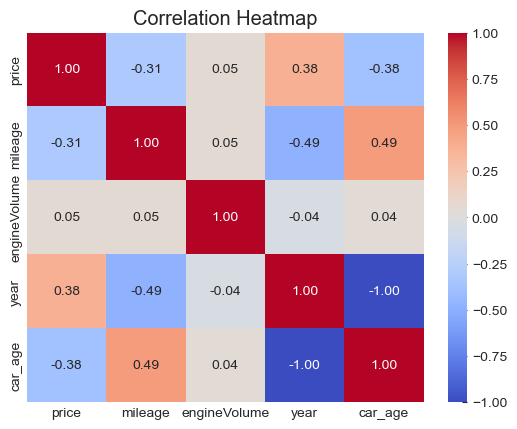

In [31]:
# Correlation Heatmap

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Top Performing Car Brand by the Company

In [32]:
top_brand1=pd.DataFrame(df['Car_Brand'].value_counts()).rename({'Car_Brand':'Total Counts'}, axis=1).rename_axis('Car Brand').head(10)

top_brand1.style.bar()

,Total Counts
Car Brand,
Volkswagen,927
Mercedes-Benz,885
BMW,684
Toyota,529
VAZ,488
Renault,467
Audi,456
Opel,399
Skoda,368


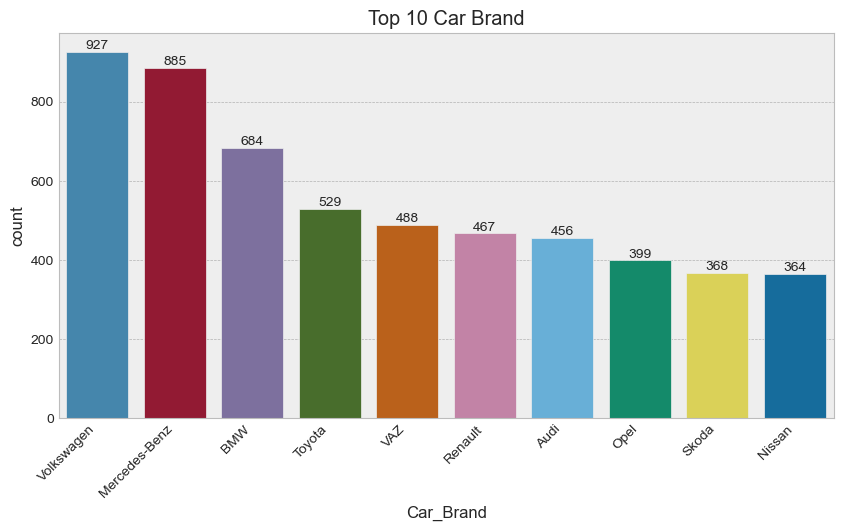

In [33]:
# Get the top 10 Car Brand
top_brand = df['Car_Brand'].value_counts().nlargest(10).index

#Filter the data to include only the top 10 Car Brand 
filtered_data = df[df['Car_Brand'].isin(top_brand)]

#Create a bar plot
plt.figure(figsize=(10,5))
br=sns.countplot(x='Car_Brand', data=filtered_data, order=top_brand)
br.bar_label(container=br.containers[0], label=top_brand.values)

# Rotating x-axis label for beter visualization
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Car Brand');

### Analysis Shows that the Car Brands with the most patronage are:

1. Volkswagen - 927
2. Mercedes-Benz - 885
3. BMW - 684
4. Toyota - 539
5. VAZ - 488
6. Renault - 467
7. Audi - 456
8. Opel - 399
9. Skoda - 368
10. Nissan - 364

## Most Popular Car Model by Top Brand

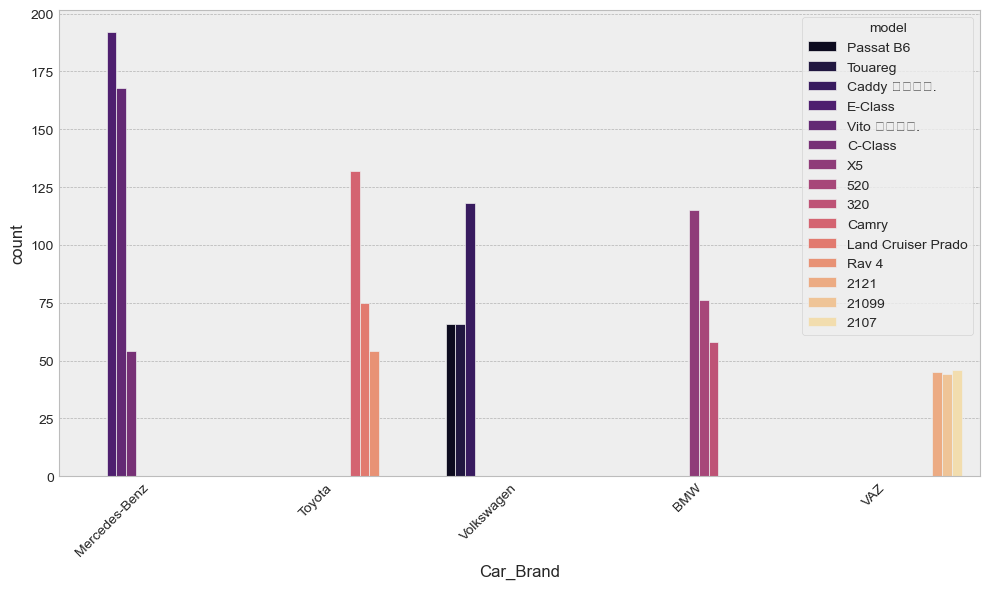

In [34]:
#Calculate the top 10 brand
top_brand = df['Car_Brand'].value_counts().nlargest(5).index




#Initialize an empty dataframe to store result

columns = ['Car_Brand','model','body','drive','engType']
tmb = pd.DataFrame(columns=columns)





for brand in top_brand:
    
    bm=filtered_data[filtered_data['Car_Brand'] == brand]
    bm_selected=bm[['Car_Brand','model','body','drive','engType']]
    
    #Top 3 in the Category
    top_model = bm_selected['model'].value_counts().nlargest(3).index
    
    
    #Filter the data to include only the top 3 Model in BMW 
    filtered_bm = bm_selected[bm_selected['model'].isin(top_model)]
    filtered_bm
    
    combine=pd.concat([tmb,filtered_bm], ignore_index=True)
    tmb=combine
    
tmb



#Filter the data to include only the top 10 Car Brand 
#filtered_data = df[df['Car_Brand'].isin(top_brand)]

#Get the order of brand by counts in descending order
brand_order = tmb.groupby('Car_Brand')['model'].count().sort_values(ascending=False).index

#brand_order
#Create a count plot using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=tmb, x='Car_Brand', hue='model',palette='magma', order=brand_order)

plt.xticks(rotation=45, ha='right')
plt.tight_layout();

### Top Performing Car Model

In [35]:
dt = df
dt.head(2)

,Car_Brand,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,13
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,12


In [36]:
dt['Model_Brand'] = dt['model'] + ' (' + dt['Car_Brand'] + ')'

dt.head(2)

,Car_Brand,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age,Model_Brand
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,13,Kuga (Ford)
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,12,E-Class (Mercedes-Benz)


In [37]:
tm=pd.DataFrame(dt['Model_Brand'].value_counts()).rename({'Model_Brand':'Total Counts'}, axis=1).rename_axis('Model_Brand').head(10)

tm.style.bar()

,Total Counts
Model_Brand,
E-Class (Mercedes-Benz),192
A6 (Audi),172
Vito ����. (Mercedes-Benz),168
Kangoo ����. (Renault),146
Camry (Toyota),132
Caddy ����. (Volkswagen),118
Lanos (Daewoo),118
X5 (BMW),115
Octavia A5 (Skoda),108


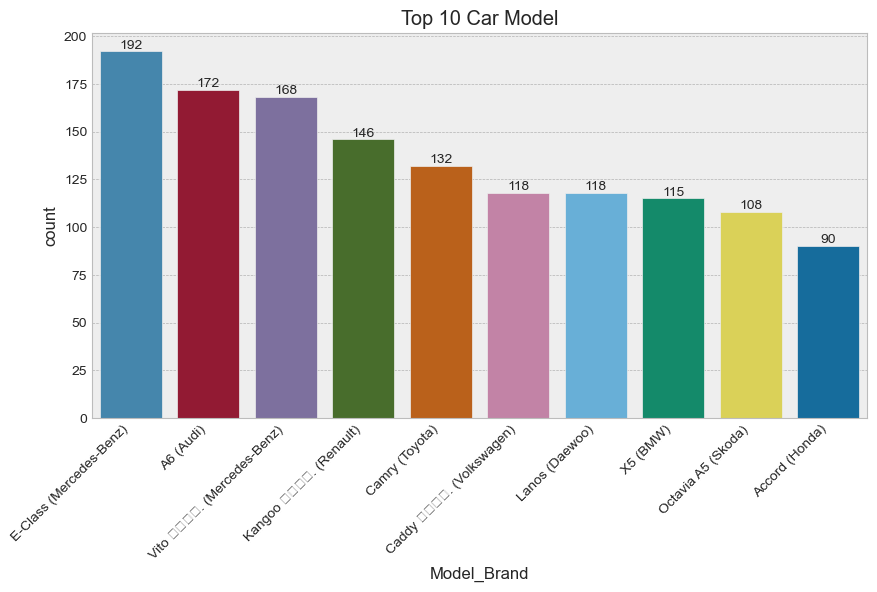

In [38]:
# Get the top 10 Car Brand
top_model = dt['Model_Brand'].value_counts().nlargest(10).index

#Filter the data to include only the top 10 Car Brand 
fil_model = dt[dt['Model_Brand'].isin(top_model)]

#Create a bar plot
plt.figure(figsize=(10,5))
br=sns.countplot(x='Model_Brand', data=fil_model, order=top_model)
br.bar_label(container=br.containers[0], label=top_model.values)

# Rotating x-axis label for beter visualization
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Car Model');

#### Analysis of Car Models (by Car Brands)

Shows that the Car Models from the popular Brands enjoy most patronage except in the case of Lanos (Daewoo) and Accord (Honda) that are not in the top brand but also enjoy a reasonable patronage to be listed in the top 10 of prefered models 

## Car Brand and Price Analysis

In [39]:
dt.head()

,Car_Brand,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age,Model_Brand
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,13,Kuga (Ford)
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,12,E-Class (Mercedes-Benz)
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,15,CL 550 (Mercedes-Benz)
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,11,B 180 (Mercedes-Benz)
4,Mercedes-Benz,33000.0,vagon,91,2.7,Other,yes,2013,E-Class,rear,10,E-Class (Mercedes-Benz)


In [40]:
dt.shape

(9459, 12)

In [41]:
Total_brand = df.groupby('Car_Brand')['price'].sum().reset_index()
Total_brand.columns = ['Car_Brand', 'Total']
Total_brand

,Car_Brand,Total
0,Acura,241207.000
1,Alfa Romeo,99449.000
2,Aro,3600.000
3,Aston Martin,315000.000
4,Audi,8132419.000
...,...,...
78,Volvo,594770.000
79,Wartburg,1000.000
80,ZAZ,321663.919
81,ZX,7700.000


In [42]:
top = Total_brand.sort_values(by='Total', ascending = False).head(10)
top

,Car_Brand,Total
50,Mercedes-Benz,2.472816e+07
5,BMW,1.519474e+07
77,Volkswagen,1.154478e+07
74,Toyota,1.128948e+07
4,Audi,8.132419e+06
42,Land Rover,7.093421e+06
55,Nissan,5.127313e+06
43,Lexus,4.821315e+06
33,Hyundai,4.496132e+06
67,Skoda,3.938992e+06


In [43]:
top['Sales']= round(top['Total'], 2)

In [44]:
top

,Car_Brand,Total,Sales
50,Mercedes-Benz,2.472816e+07,24728162.00
5,BMW,1.519474e+07,15194741.25
77,Volkswagen,1.154478e+07,11544779.27
74,Toyota,1.128948e+07,11289477.20
4,Audi,8.132419e+06,8132419.00
42,Land Rover,7.093421e+06,7093421.00
55,Nissan,5.127313e+06,5127312.89
43,Lexus,4.821315e+06,4821315.20
33,Hyundai,4.496132e+06,4496132.26
67,Skoda,3.938992e+06,3938992.37


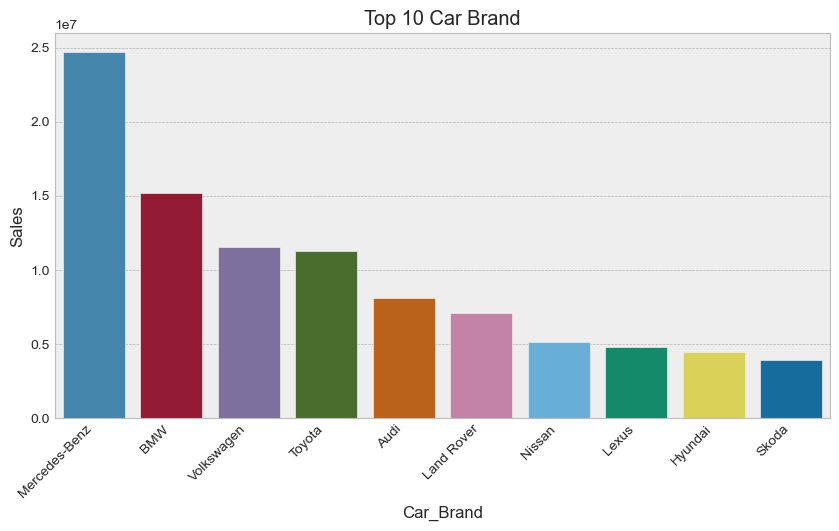

In [46]:


#Create a bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=top, x='Car_Brand', y='Sales');
#br.bar_label(container=br.containers[0], label=top['Sales'])

# Rotating x-axis label for beter visualization
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Car Brand');


### Insight

The analysis shows that, even though *Land Rover, Lexus and Hyundai* are not among the most popular with customer they tends to generate more sales value than popular brand like *VAZ, Renault and Opel*.

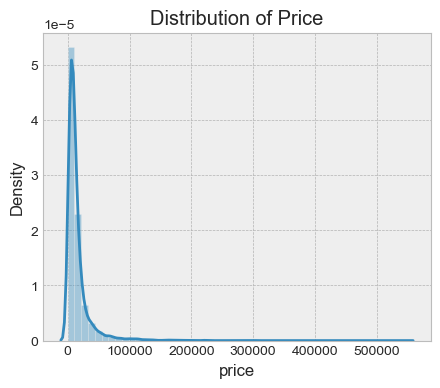

In [47]:


# distribution of price

plt.figure(figsize = (5,4))

sns.distplot(df['price'])

plt.title('Distribution of Price')
plt.show()

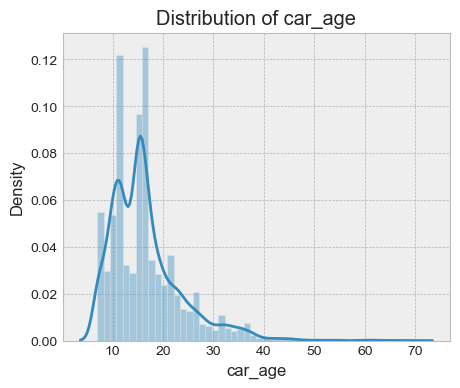

In [48]:
# distribution of Car Age

plt.figure(figsize = (5,4))

sns.distplot(df['car_age'])

plt.title('Distribution of car_age')
plt.show()

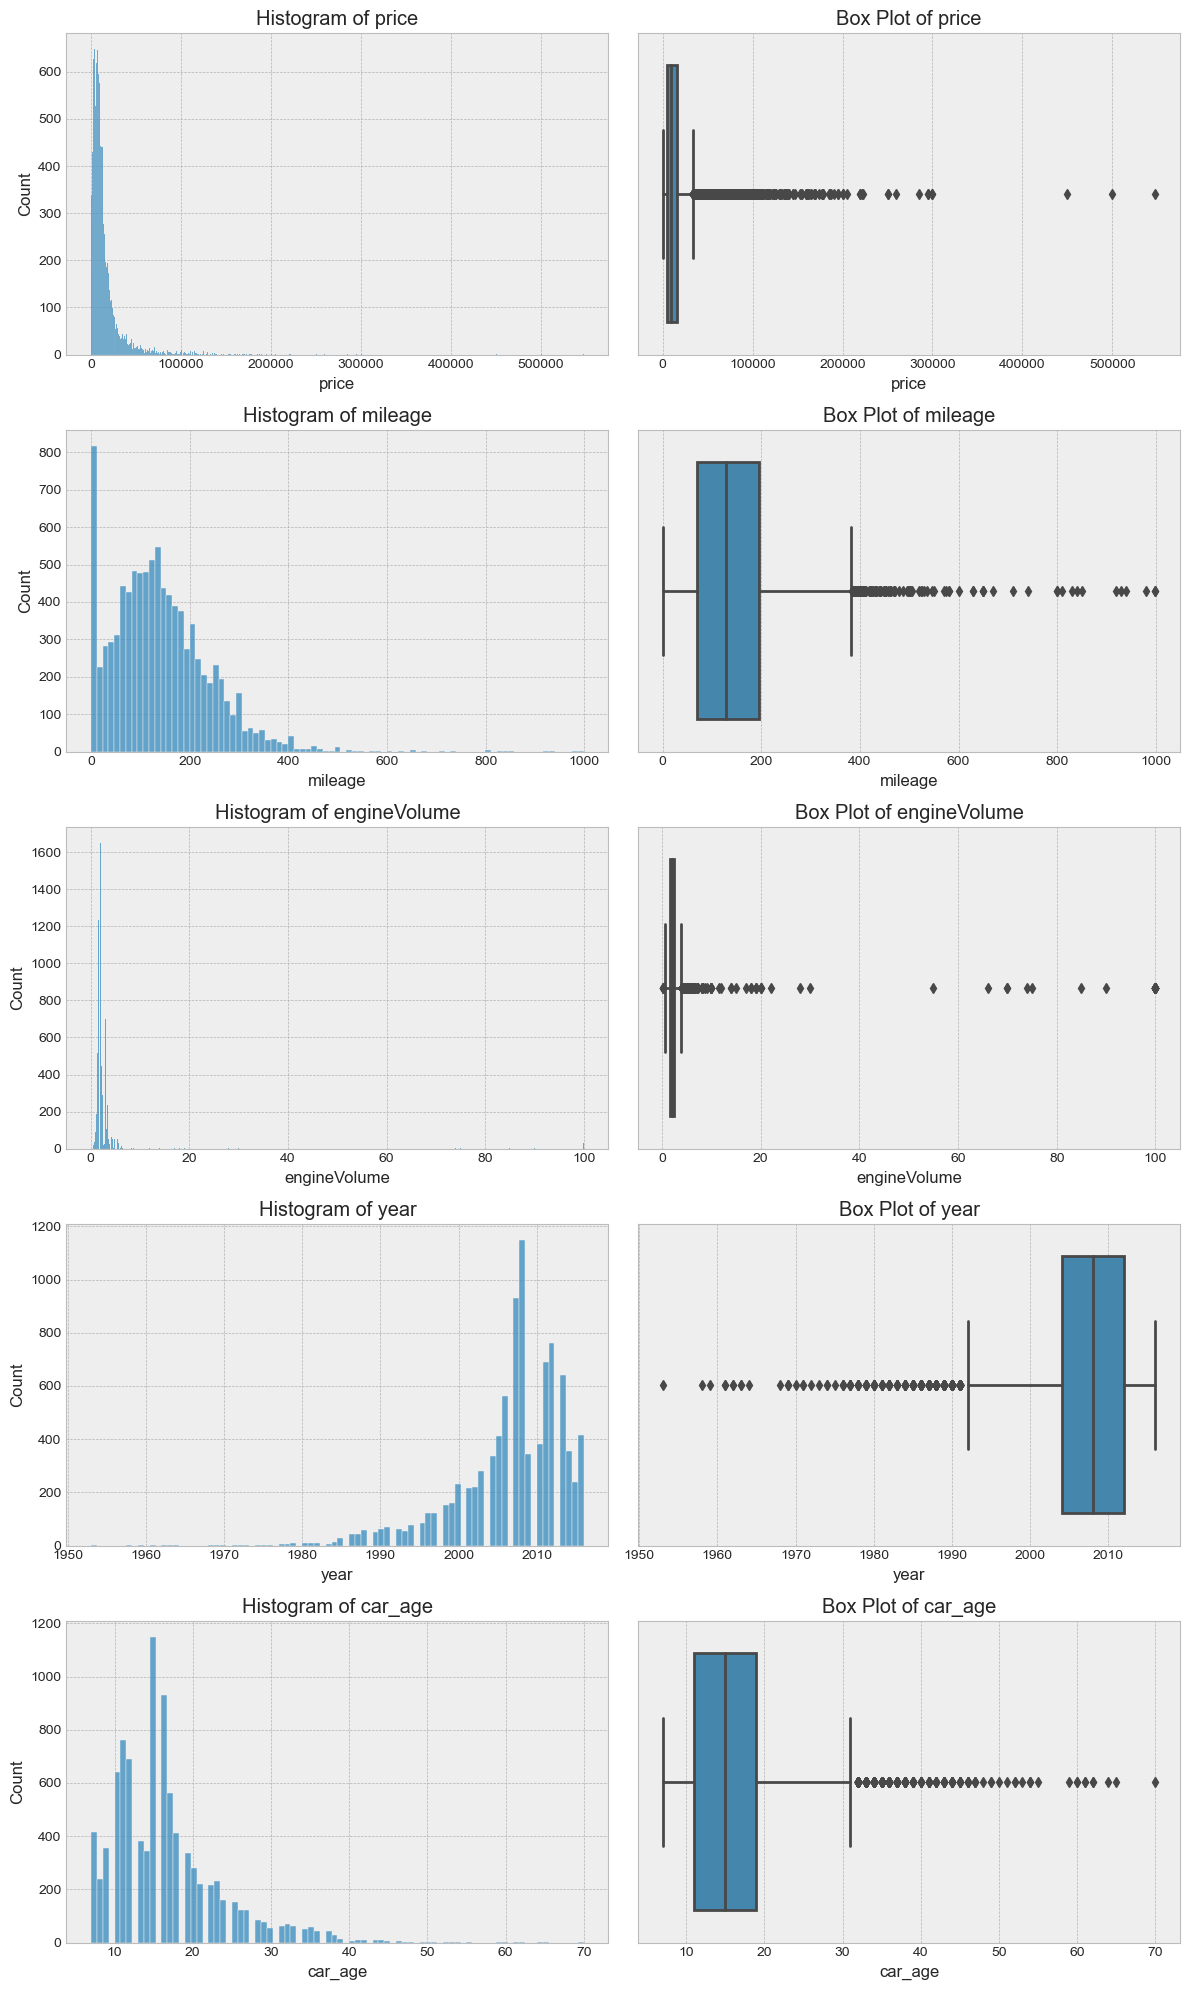

In [49]:
fig, axes = plt.subplots(5, 2, figsize = (12,20))


for index, col in enumerate(num_feat):
    
    # histogram
    sns.histplot(data=df, x = col, ax = axes[index, 0])
    axes[index, 0].set_title(f'Histogram of {col}')
    
    
    # boxplot
    sns.boxplot(data=df, x = col, ax = axes[index, 1])
    axes[index, 1].set_title(f'Box Plot of {col}')
    
plt.tight_layout()
plt.show()

### Analysis of Price and the car body type 

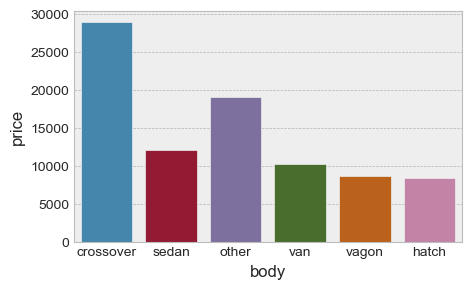

In [50]:
plt.figure(figsize=(5,3))
sns.barplot(x= 'body', y = 'price', data = df, ci = None);

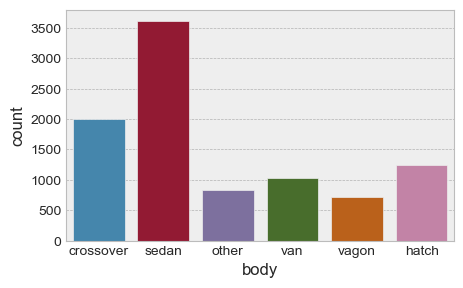

In [55]:
plt.figure(figsize=(5,3))
sns.countplot(x='body', data=df);

### Insight

The Analysis shows that the most popular car body type is the *Sedan* and the *Crossover* body type contributed most to the sales